In [1]:
# Este archivo está creado para poder visualizar los datos y realizar una limpieza, si hiciese falta. 

In [2]:
# importo todas las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [3]:
data='./db/titanic/train.csv'
df = pd.read_csv(data)
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
""" Observamos que la base de datos no tiene nulos. En esta celda explicamos brevemente los datos con los que contamos:  
-PassengerId  número entero asignado al pasajero (único)
-Survived: booleano que indica si el pasajero sobrevivió (1) o no (0)
-Pclass: Clase del ticket 1 = 1st, 2 = 2nd, 3 = 3rd
-Name: Nombre del pasajero/a
-Sex: Sexo del pasajero/a
-Age: Edad del pasajero/a
-SibSp: número de hermanos/as que subieron al barco
-Parch: Número de padres que subieron al barco
-Ticket: nro de tiquet
-Fare: Tarifa pagada
-Cabin: número de cabina
Embarked: Puerto de embarque C = Cherbourg, Q = Queenstown, S = Southampton
"""

' Observamos que la base de datos no tiene nulos. En esta celda explicamos brevemente los datos con los que contamos:  \n-PassengerId  número entero asignado al pasajero (único)\n-Survived: booleano que indica si el pasajero sobrevivió (1) o no (0)\n-Pclass: Clase del ticket 1 = 1st, 2 = 2nd, 3 = 3rd\n-Name: Nombre del pasajero/a\n-Sex: Sexo del pasajero/a\n-Age: Edad del pasajero/a\n-SibSp: número de hermanos/as que subieron al barco\n-Parch: Número de padres que subieron al barco\n-Ticket: nro de tiquet\n-Fare: Tarifa pagada\n-Cabin: número de cabina\nEmbarked: Puerto de embarque C = Cherbourg, Q = Queenstown, S = Southampton\n'

In [6]:
#Llevo los nombres de las columnas a lower para una escritura más simple
df.columns = [df.columns[i].lower() for i in range(len(df.columns))]

In [7]:
# Vemos que en la información de cabina hay datos Nan. A priori pareciera que son pasajeros de 3ra clase. 
df[df.pclass == 3].cabin.unique()


array([nan, 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38'],
      dtype=object)

In [8]:
df['cabin'].isna().sum()/len(df.cabin)*100

77.10437710437711

In [9]:
df.cabin[df['cabin'].isna()] = 'missing-value'

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_22340\1231735791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin[df['cabin'].isna()] = 'missing-value'


In [10]:
df.cabin

0      missing-value
1                C85
2      missing-value
3               C123
4      missing-value
           ...      
886    missing-value
887              B42
888    missing-value
889             C148
890    missing-value
Name: cabin, Length: 891, dtype: object

In [11]:
df.cabin.unique()

array(['missing-value', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
     

In [12]:
# Dado que hay un 70% de faltante de datos del número de cabina, se elige descartar ese dato. Queda para un análisis posterior si hay alguna relación entre le número de cabina (ubicación?) con la supervivencia.
df.drop('cabin',axis=1,inplace=True)

In [13]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<function matplotlib.pyplot.show(close=None, block=None)>

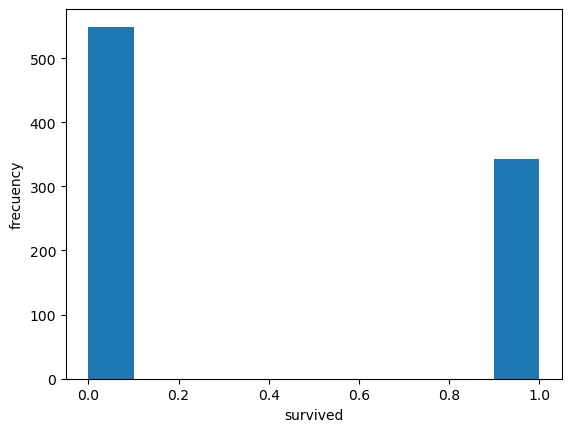

In [14]:
# Analicemos algunas variables más.
# Variable survived
plt.figure()
plt.xlabel('survived')
plt.ylabel('frecuency')
plt.hist(df.survived)
plt.show

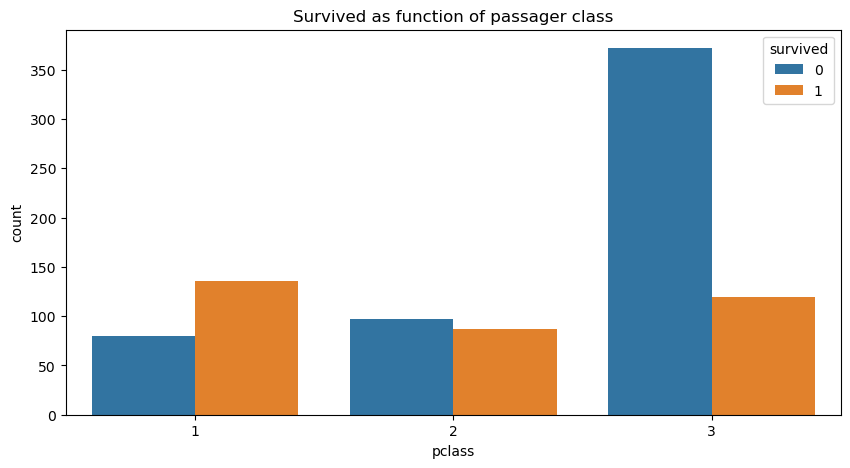

In [15]:
# Podemos observar que del database sobrevivió casi la mitad. 
# Veamos si hay una relación con la clase
plt.figure(figsize=(10,5))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survived as function of passager class')
plt.show()


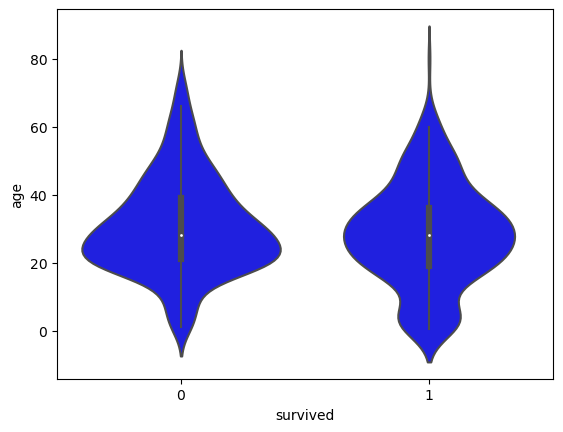

In [16]:
# Podemos observar que los pasajeros de 3ra clase tienen menos chances de supervivencia que el resto de los pasajeros, esto podría deberse a la ubicación de sus camarotes.
# Sigamos estudiando variables, ¿qué relación de sexo hay entre los superviventes? ¿qué distribución de edad hay?
sns.violinplot(
    x='survived', 
    y='age', 
    data=df, 
    color='blue');

In [17]:
# Se puede observar  que los violin plot difieren, no significativamente, pudiendo observarse que la gente de menor edad por alguna razón tuvo más chances de supervivencia.